The following notebook is about the analysis of Spotify TOP 100 streamed songs in order to find interesting patterns between these top songs.

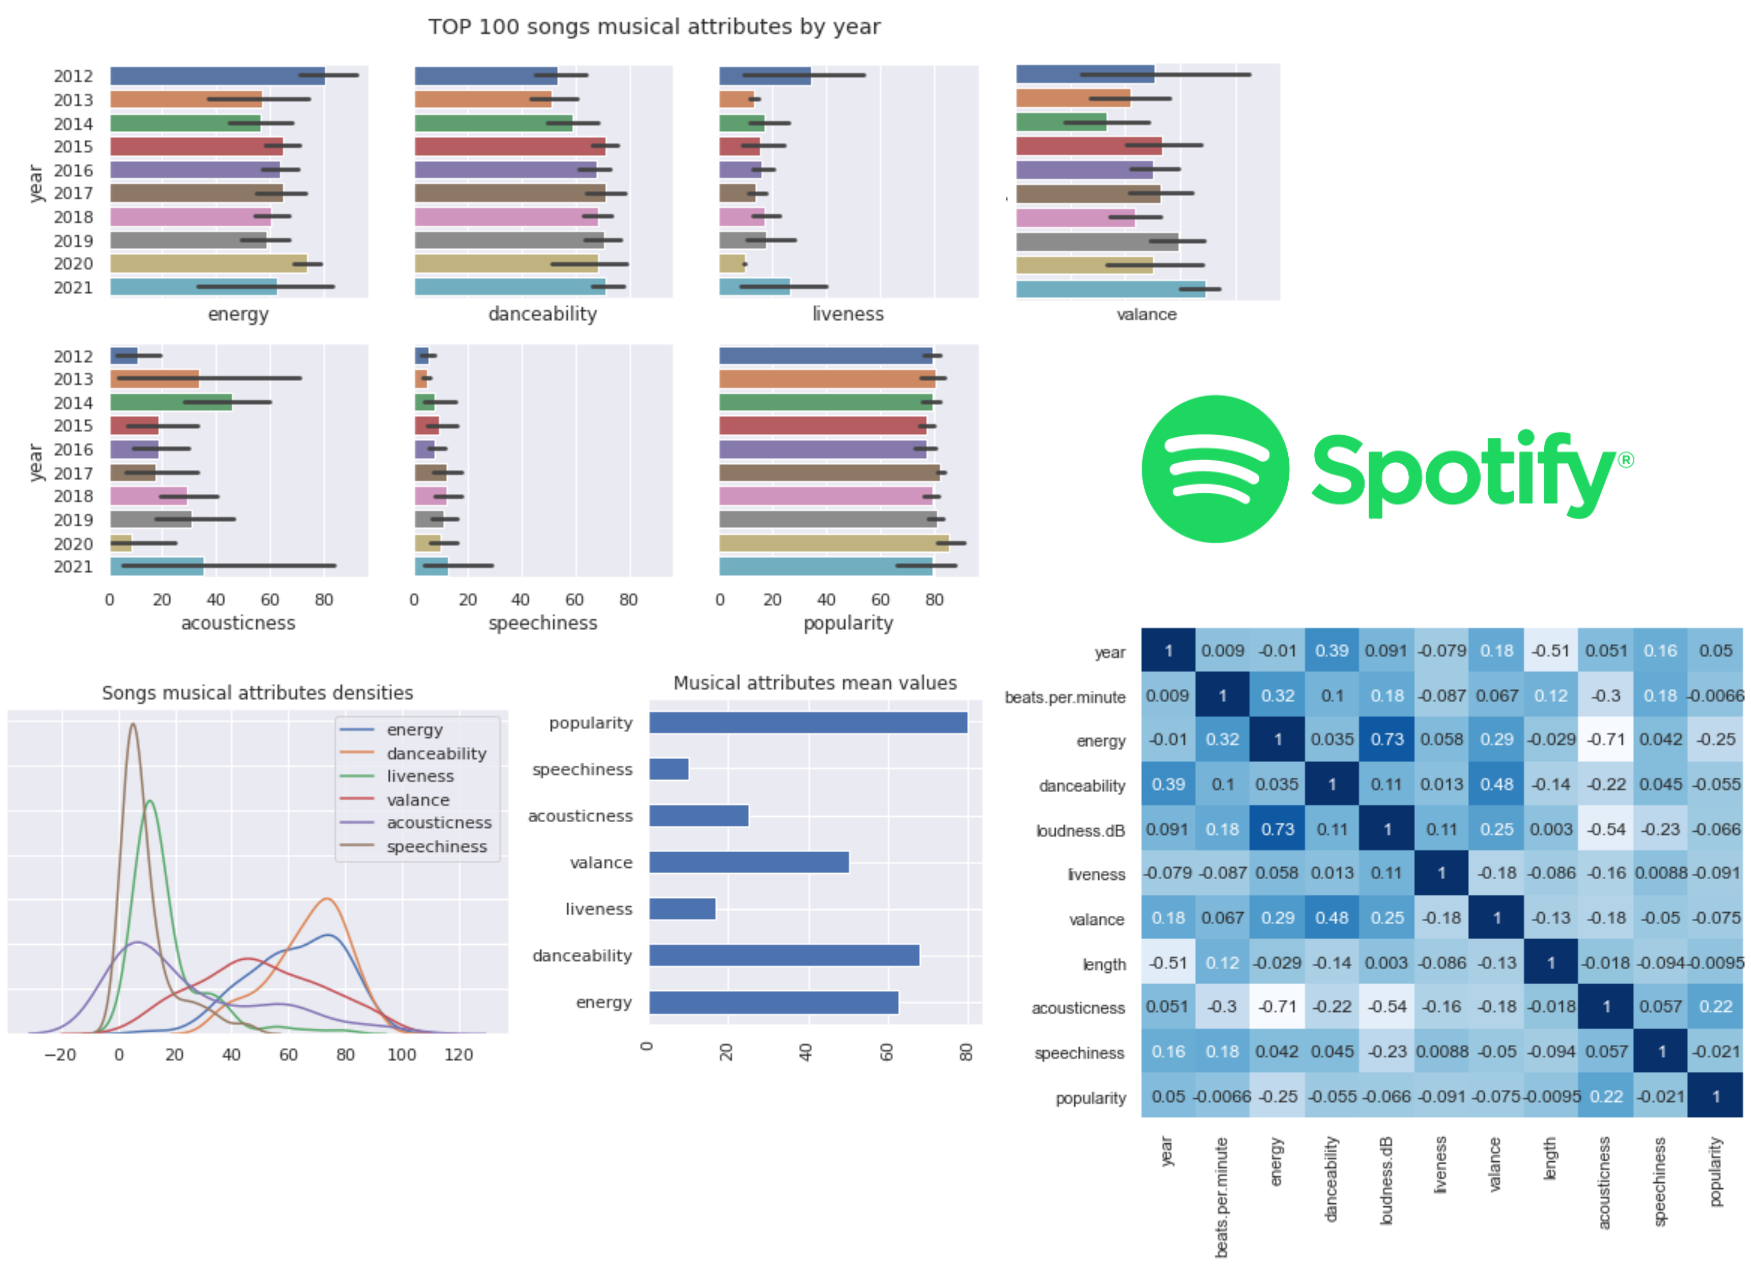

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-most-streamed-songs-on-spotify/Top 100 most Streamed - Sheet1.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_theme()

Dataframe info:

- acousticness: [0–1] Confidence measure of whether the track is acoustic.
- danceability: [0–1] Describes how suitable a track is for dancing based on musical attributes including tempo, rhythm, stability, beat strength, and overall regularity.
- energy: [0–1] Perceptual measure of intensity and activity. Energetic tracks feel fast, loud, and noisy (e.g. death metal: high energy, Bach prelude: low energy).
- instrumentalness: [0–1] Predicts whether a track contains no vocals (values above 0.5 represent instrumental tracks whereas rap songs would have a score close to 0).
- liveness: [0–1] Detects the presence of an audience in the recording.
- loudness: [-60–0 dB] The average volume across an entire track.
- speechiness: [0–1] Detects the presence of spoken words in a track (values above 0.66 describe tracks that are probably made entirely of spoken words, 0.33–0.66 describe tracks that may contain both music and speech, and values below 0.33 most likely represent music and other non-speech-like tracks).
- valence: [0–1] Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: [0–300 BPM] The speed or pace of a given piece, as derived from the estimated average beat duration.

In [3]:
df = pd.read_csv('/kaggle/input/top-100-most-streamed-songs-on-spotify/Top 100 most Streamed - Sheet1.csv')

In [4]:
df.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


In [6]:
df.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


We can see that each song is characterized by different numerical features. They will be anaylzed to see if TOP songs have some of these features in common.

# Exploratory Data Analysis

# Release year 

First, the year column will be analyzed. The conclusions that will be made about years and their impact on the musical features will be confined to these 100 songs. This means that possible trends related to the release year of the songs could not be true for all songs released during that year but just by analyzing this dataset. Nonetheless, it is still intersting to see if some patterns or insigths can be found by just looking at this data.

<AxesSubplot:xlabel='year'>

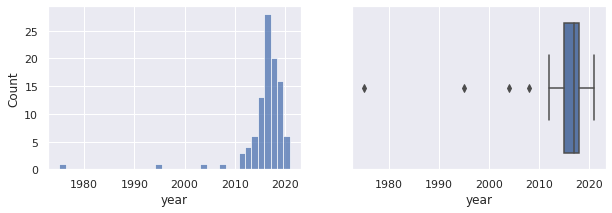

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year', data=df)
sns.boxplot(ax=ax[1],x='year', data=df)

There are some outliers, identified by a release year prior to 2010.

In [8]:
df[df['year'] < 2010]

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
44,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,71,40,41,-10,30,22,354,27,5,81
53,Mr. Brightside,The Killers,alternative rock,2004,148,91,35,-5,10,24,223,0,7,81
68,I'm Yours,Jason Mraz,acoustic pop,2008,151,46,69,-8,11,72,242,60,5,80
82,Wonderwall - Remastered,Oasis,beatlesque,1995,174,90,38,-4,19,47,259,0,4,77


There are 4 'old' songs (in tersm of release data). In particular, two of them are remastered of original songs (Bohemian Rhapsody and Wonderwall).

These 4 songs will be removed from the dataset, in order to improve the readability of the next plots.

In [9]:
df_clean = df.loc[df['year'] > 2010]

In [10]:
df_clean['year']

0     2020
1     2019
2     2021
3     2019
4     2017
      ... 
95    2016
96    2015
97    2021
98    2018
99    2016
Name: year, Length: 96, dtype: int64

# Release year vs other features

Is there a relationship between the numerical musical features and the release year?

## BPM VS YEAR

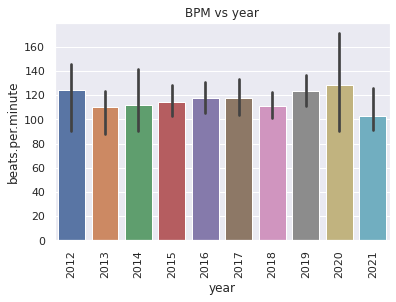

In [11]:
sns.barplot(x='year', y= 'beats.per.minute', data=df_clean)
plt.xticks(rotation=90);
plt.title('BPM vs year');

We can see a small increasing trend for BPM between the years 2013 and 2020. In 2021 we can see a quite low BPM compared to the other years.

## LENGTH VS YEAR

Text(0.5, 1.0, 'Length vs year')

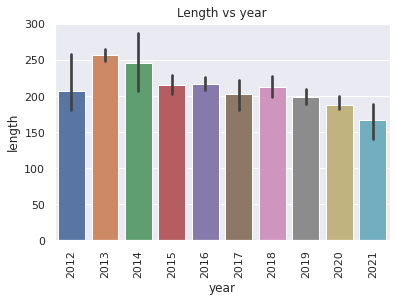

In [12]:
sns.barplot(x='year', y= 'length', data=df_clean)
plt.xticks(rotation=90);
plt.title('Length vs year')

There is a quite negative trend for what concerns songs length during the years.

## LOUDNESS VS YEAR

Text(0.5, 1.0, 'Loudness vs year')

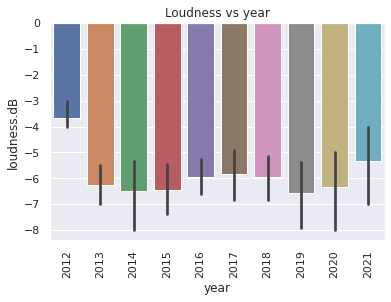

In [13]:
sns.barplot(x='year', y= 'loudness.dB', data=df_clean)
plt.xticks(rotation=90);
plt.title('Loudness vs year')

We can see that the loudness quite descreased after 2021. In particular, during the year 2021 the loudness increased slightly. 

# Release year VS Musical attributes

In the following, musical numerical features will be analyzed and comapred to the release year of the songs.

In [14]:
def plot_features_obj(df,string):
    fig, ax = plt.subplots(2,4, figsize=(12,6),sharey=True, sharex=True)
    fig.suptitle('TOP 100 songs musical attributes by year')
    sns.barplot(ax=ax[0,0], y=string, x= 'energy', data=df, orient = 'h')
    sns.barplot(ax=ax[0,1], y=string, x= 'danceability', data=df, orient = 'h')
    sns.barplot(ax=ax[0,2], y=string, x= 'liveness', data=df, orient = 'h')
    sns.barplot(ax=ax[0,3], y=string, x= 'valance', data=df, orient = 'h')
    sns.barplot(ax=ax[1,0], y=string, x= 'acousticness', data=df, orient = 'h')
    sns.barplot(ax=ax[1,1], y=string, x= 'speechiness', data=df, orient = 'h')
    sns.barplot(ax=ax[1,2], y=string, x= 'popularity', data=df, orient = 'h')
    ax=ax[1,3].axis('off')
    plt.tight_layout()

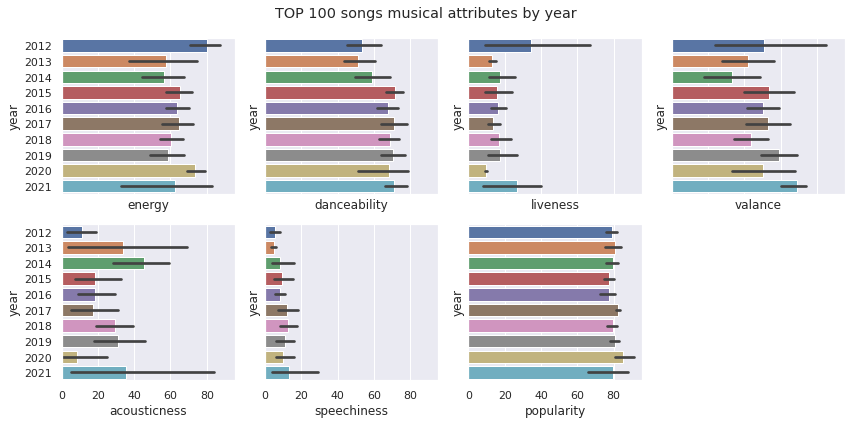

In [15]:
plot_features_obj(df_clean,'year')

We can see that danceability and speechiness in songs increased during the years.<br>
Valance as well has a small increasing trend by years and liveness and acousticness have a very wide range of values for the year 2021, and the mean looks quite high comparing to other years.

Moreover, it could be interesting to check the mean values of these features as well

First, we create a dataframe including the musical features only.

In [16]:
df_feat = df_clean.drop(['year','artist','top genre','title','loudness.dB','length','beats.per.minute'], axis=1)

Then, we can plot the mean values for each column.

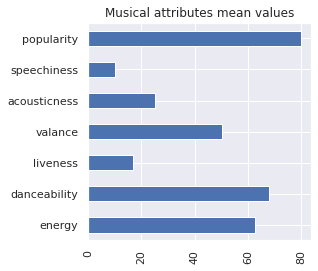

In [17]:
plt.figure(figsize=(4,4))
df_feat.mean().plot(kind='barh')
plt.xticks(rotation=90);
plt.title('Musical attributes mean values');

In [18]:
df_feat.mean()

energy          62.510417
danceability    67.843750
liveness        16.833333
valance         50.333333
acousticness    25.083333
speechiness     10.125000
popularity      79.666667
dtype: float64

According to these plots, the TOP 100 spotify songs are characterized by:
- quite high danceability, energy and popularity
- quite low values of liveness and speechiness.<br>

Acoustincess has low values as well, in particular, the confidence interval for acoustincess for 2021 has a very wide range of values. 

# Songs by artist analysis

## Are there artists with multiple songs than one song in the 100 chart?

In [19]:
df['artist'].value_counts()

Post Malone        7
Ed Sheeran         5
The Weeknd         4
Imagine Dragons    4
Shawn Mendes       3
                  ..
DJ Snake           1
Mark Ronson        1
Lauv               1
The Killers        1
Mike Posner        1
Name: artist, Length: 64, dtype: int64

Text(0.5, 0, 'song counts by artist')

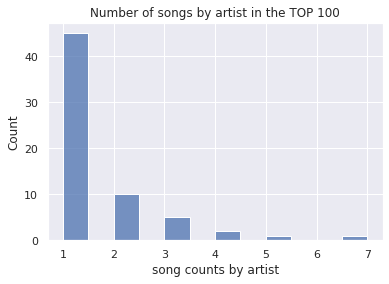

In [20]:
sns.histplot(df['artist'].value_counts())
plt.title('Number of songs by artist in the TOP 100')
plt.xlabel('song counts by artist')

We can see that most artists have just one song in the top 10.

## Which are the artists with more than one song in the top 100?

In [21]:
df_art = df['artist'].value_counts()

In [22]:
top_art = df_art[df_art > 1]
top_art

Post Malone          7
Ed Sheeran           5
The Weeknd           4
Imagine Dragons      4
Shawn Mendes         3
Billie Eilish        3
Maroon 5             3
The Chainsmokers     3
Justin Bieber        3
Travis Scott         2
Luis Fonsi           2
Drake                2
Dua Lipa             2
Twenty One Pilots    2
Ariana Grande        2
XXXTENTACION         2
Sam Smith            2
Major Lazer          2
Charlie Puth         2
Name: artist, dtype: int64

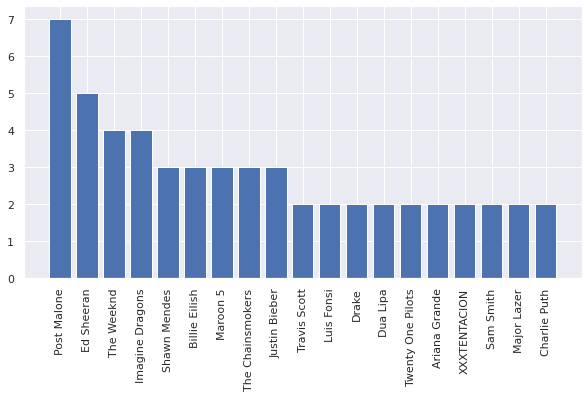

In [23]:
plt.figure(figsize=(10,5))
plt.bar(top_art.index, top_art)
plt.xticks(rotation=90);

We can see that post Malone has 7 songs in top 10, Ed Sheeran has 5, then both The Weekend and Imagine Draongs have 4. The other artists in this top artist dataframe has either 3 or 2 songs

# TOP artists analysis

Let's analyze the songs by 4 top artists (in terms of number of songs in the TOP 100 list).

In [24]:
def plot_features_all(df):
    fig, ax = plt.subplots(2,5, figsize=(10,4.5),sharey=True)
    fig.suptitle('TOP 100 songs musical attributes')
    sns.histplot(ax=ax[0,0], x= 'beats.per.minute', data=df, kde=True)
    sns.histplot(ax=ax[0,1], x= 'energy', data=df, kde=True)
    sns.histplot(ax=ax[0,2], x= 'danceability', data=df, kde=True)
    sns.histplot(ax=ax[0,3], x= 'loudness.dB', data=df, kde=True)
    sns.histplot(ax=ax[0,4], x= 'liveness', data=df, kde=True)
    sns.histplot(ax=ax[1,0], x= 'valance', data=df, kde=True)
    sns.histplot(ax=ax[1,1], x= 'length', data=df, kde=True)
    sns.histplot(ax=ax[1,2], x= 'acousticness', data=df, kde=True)
    sns.histplot(ax=ax[1,3], x= 'speechiness', data=df, kde=True)
    sns.histplot(ax=ax[1,4], x= 'popularity', data=df, kde=True)
    plt.setp(plt.gcf().get_axes(), yticks=[]);
    plt.xlabel('Attribute value')
    plt.tight_layout()

In [25]:
def plot_features(df):
    plt.title('Songs musical attributes densities')
    sns.kdeplot(x= 'energy', data=df, label='energy')
    sns.kdeplot(x= 'danceability', data=df, label='danceability')
    sns.kdeplot(x= 'liveness', data=df, label='liveness')
    sns.kdeplot(x= 'valance', data=df, label='valance')
    sns.kdeplot(x= 'acousticness', data=df, label='acousticness')
    sns.kdeplot(x= 'speechiness', data=df, label='speechiness')
    plt.xlabel('')
    plt.legend()

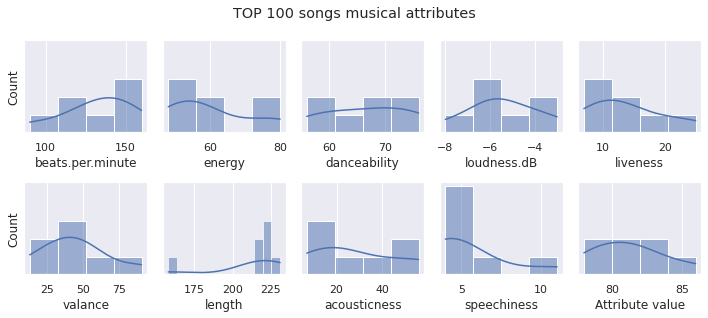

In [26]:
 plot_features_all(df[df['artist']== 'Post Malone'])

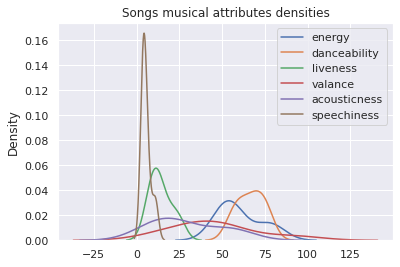

In [27]:
plot_features(df[df['artist']== 'Post Malone'])

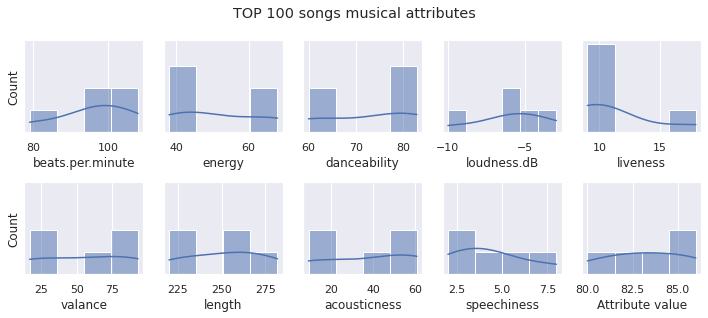

In [28]:
plot_features_all(df[df['artist']== 'Ed Sheeran'])

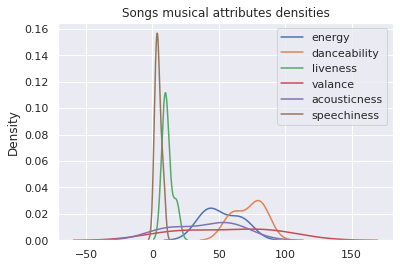

In [29]:
plot_features(df[df['artist']== 'Ed Sheeran'])

From these plots, we can see some similarities between ed sheeran songs and post malone:
- Speechiness: mostly less than 10 (mean speechiness among the songs is 10)
- liveness: centered in 10 ( mean liveness among the songs is 17)
- energy and danceability mostly between 50 and 75

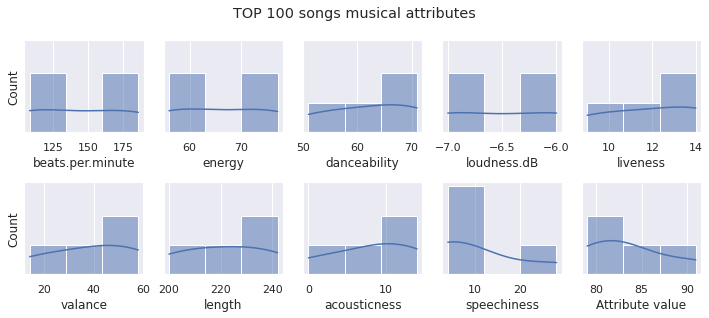

In [30]:
plot_features_all(df[df['artist']== 'The Weeknd'])

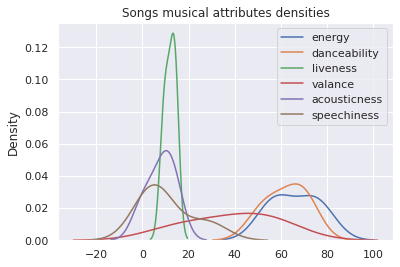

In [31]:
plot_features(df[df['artist']== 'The Weeknd'])

We can see that the liveness is similar to post malone and ed sheeran top songs. Moreover, energy and danceability are slightly higher values compared to ed sheeran and post malone, but still have a similar distributions overall (energy and danceability are distributed similarly) 

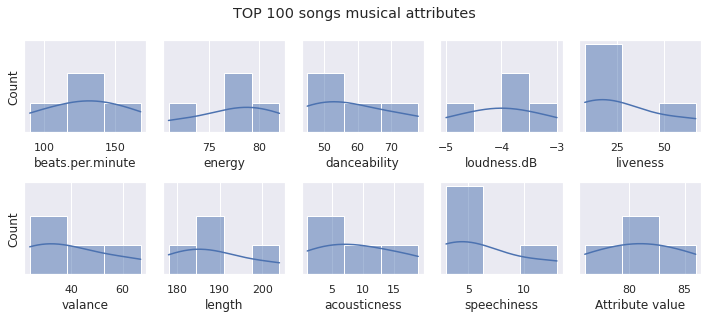

In [32]:
plot_features_all(df[df['artist']== 'Imagine Dragons'])

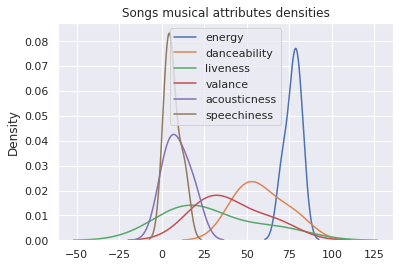

In [33]:
plot_features(df[df['artist']== 'Imagine Dragons'])

For what concerns Imagine Dragons, the situation looks quite different. Speechiness has low values like Post Malone and Ed Sheeran, but the energy is quite different from dacneabiloity and in paritcualr is quite focused around the value of 75.

Judging from these plots, we can see that the songs from the top artists have low values of liveness and speechiness ( always less than 10), and energy and dacneability in the range 50-80.

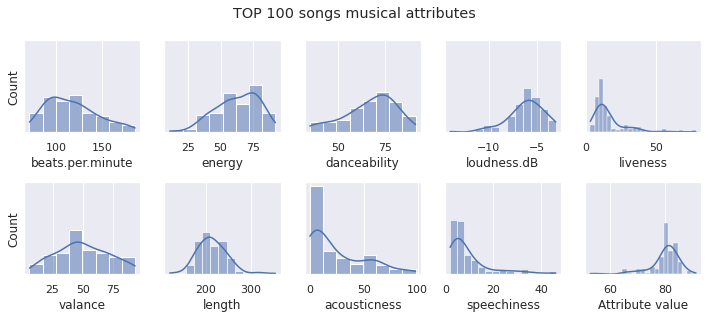

In [34]:
plot_features_all(df)

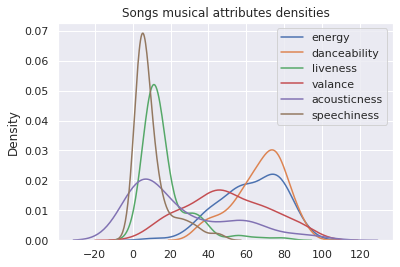

In [35]:
plot_features(df)

About the TOP 100 songs we can say then:
- Quite low values of speechiness and liveness (mostly lower than 10)
- Energy and danceability with a similar distribution, mostly between 60 and 80
- Low values of acousticness

# Correlation Matrix

<AxesSubplot:>

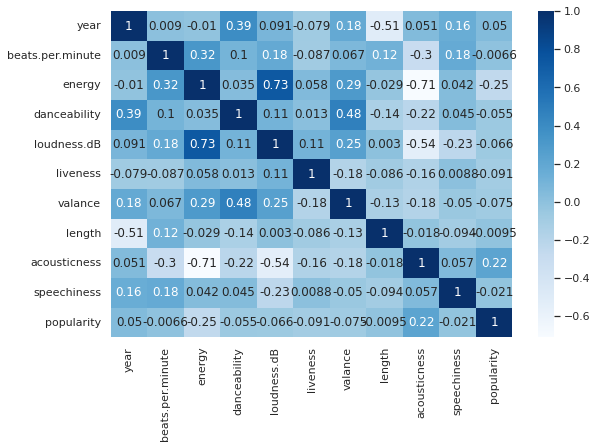

In [36]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

From the correlation matrix we can say:

- High positive correlation between loudness and energy (+0.73)
- High negative correlation between acousticness and energy (-0.71)
- Fairly high positive correlation between valance and danceability (+0.48)
- Failry high negative correlation between loudness and acousticness (-0.54)

## This notebook is still a WIP, I will see what I can do next !! Thanks for reading :)!